In [1]:
import os
import json
import sys

In [2]:
root_dir = os.path.join(os.getcwd(), "..")
sys.path.append(root_dir)

### Dependencies 

In [3]:
# an example to load in a specfic module
from src.data.get_dataloader import get_dataloaders

### Config

In [4]:
# an example to load in a json
#path = "../config/example_config.json"
path = "../config/resnet18_config.json"
with open(path) as json_file:
    config = json.load(json_file)

In [5]:
config

{'experiment_name': 'test',
 'data': {'path': './data',
  'dataset': 'mnist',
  'image_channels': 1,
  'num_classes': 10,
  'batch_size': 512,
  'num_workers': 2,
  'val_split': 0.2},
 'model': {'type': 'resnet18',
  'num_blocks': [2, 2, 2, 2],
  'save_path': './models/resnet18.pth',
  'init_method': 'normal'},
 'optimizer': {'type': 'sgd',
  'lr': 0.0001,
  'momentum': 0.9,
  'weight_decay': 0.0001,
  'nestrov': False},
 'training': {'epochs': 30, 'criterion': 'cross_entropy'},
 'visualize': {'perform': False, 'save_path': './reports/figures/'}}

In [6]:
# perform some modification
config['data']['path'] = "../data"
config['training']['epochs'] = 30

###  DataLoaders

In [7]:
from src.data.get_dataloader import get_dataloaders

In [8]:
train_dataloader, validation_dataloader, test_dataloader = get_dataloaders(config)

Creating dataloaders...
Dataloaders created


### Model

In [9]:
from src.model.get_model import get_model

## We want to create some snapshots on the network
@ epoch 0, epoch 5, epoch 15, epoch 30

In [10]:
import copy
from src.model.train_model import train_model
from src.model.test_model import test_model

In [11]:
path = "../config/resnet18_config.json"
with open(path) as json_file:
    config = json.load(json_file)
config['data']['path'] = "../data"
config['training']['epochs'] = 1
config['optimizer']['lr'] = 1e-7

In [12]:
model = get_model(config)
model_epoch0 = copy.deepcopy(model)
testing_loss, testing_acc = test_model(model, test_dataloader, config)

Creating model...
Model resnet18 created
Testing model...
Using device cuda
Testing loss: 2.3034, Testing accuracy: 9.8200


In [13]:
# train the first epoch
trained_model, training_losses, training_accuracies, validation_losses, validation_accuracies =\
    train_model(model, train_dataloader, validation_dataloader, config)
model_epoch1 = copy.deepcopy(model)
testing_loss, testing_acc = test_model(model, test_dataloader, config)

Training model...
Using device cuda


Train (loss=2.286, acc=17.947): 100%|█████████████████████████████████| 1/1 [00:20<00:00, 20.46s/it]

Testing model...
Using device cuda


Testing loss: 2.3028, Testing accuracy: 10.2800


In [14]:
# train the 2 epoch
trained_model, training_losses, training_accuracies, validation_losses, validation_accuracies =\
    train_model(model, train_dataloader, validation_dataloader, config)
model_epoch2 = copy.deepcopy(model)
testing_loss, testing_acc = test_model(model, test_dataloader, config)

Training model...
Using device cuda


Train (loss=1.545, acc=61.179): 100%|█████████████████████████████████| 1/1 [00:20<00:00, 20.41s/it]

Testing model...
Using device cuda


Testing loss: 0.7163, Testing accuracy: 82.5800


In [15]:
# train the 3 epoch
trained_model, training_losses, training_accuracies, validation_losses, validation_accuracies =\
    train_model(model, train_dataloader, validation_dataloader, config)
model_epoch3 = copy.deepcopy(model)
testing_loss, testing_acc = test_model(model, test_dataloader, config)

Training model...
Using device cuda


Train (loss=0.524, acc=90.162): 100%|█████████████████████████████████| 1/1 [00:20<00:00, 20.41s/it]

Testing model...
Using device cuda


Testing loss: 0.3042, Testing accuracy: 94.2900


## Methodology of wTw Analysis

In [21]:
import matplotlib.pyplot as plt

In [22]:
weight_0 = model_epoch0.conv1.weight.data.detach().cpu().numpy()
weight_1 = model_epoch1.conv1.weight.data.detach().cpu().numpy()
weight_2 = model_epoch2.conv1.weight.data.detach().cpu().numpy()
weight_3 = model_epoch3.conv1.weight.data.detach().cpu().numpy()
# weight_4 = model_epoch4.conv1.weight.data.detach().cpu()
# weight_5 = model_epoch5.conv1.weight.data.detach().cpu()

In [23]:
# method 1, reshape to (64, 9) and see the 64 * 64 matrix
weight_0 = weight_0.reshape((64, 9))
weight_1 = weight_1.reshape((64, 9))
weight_2 = weight_2.reshape((64, 9))
weight_3 = weight_3.reshape((64, 9))
# weight_4 = weight_4.reshape((64, 9))
# weight_5 = weight_5.reshape((64, 9))

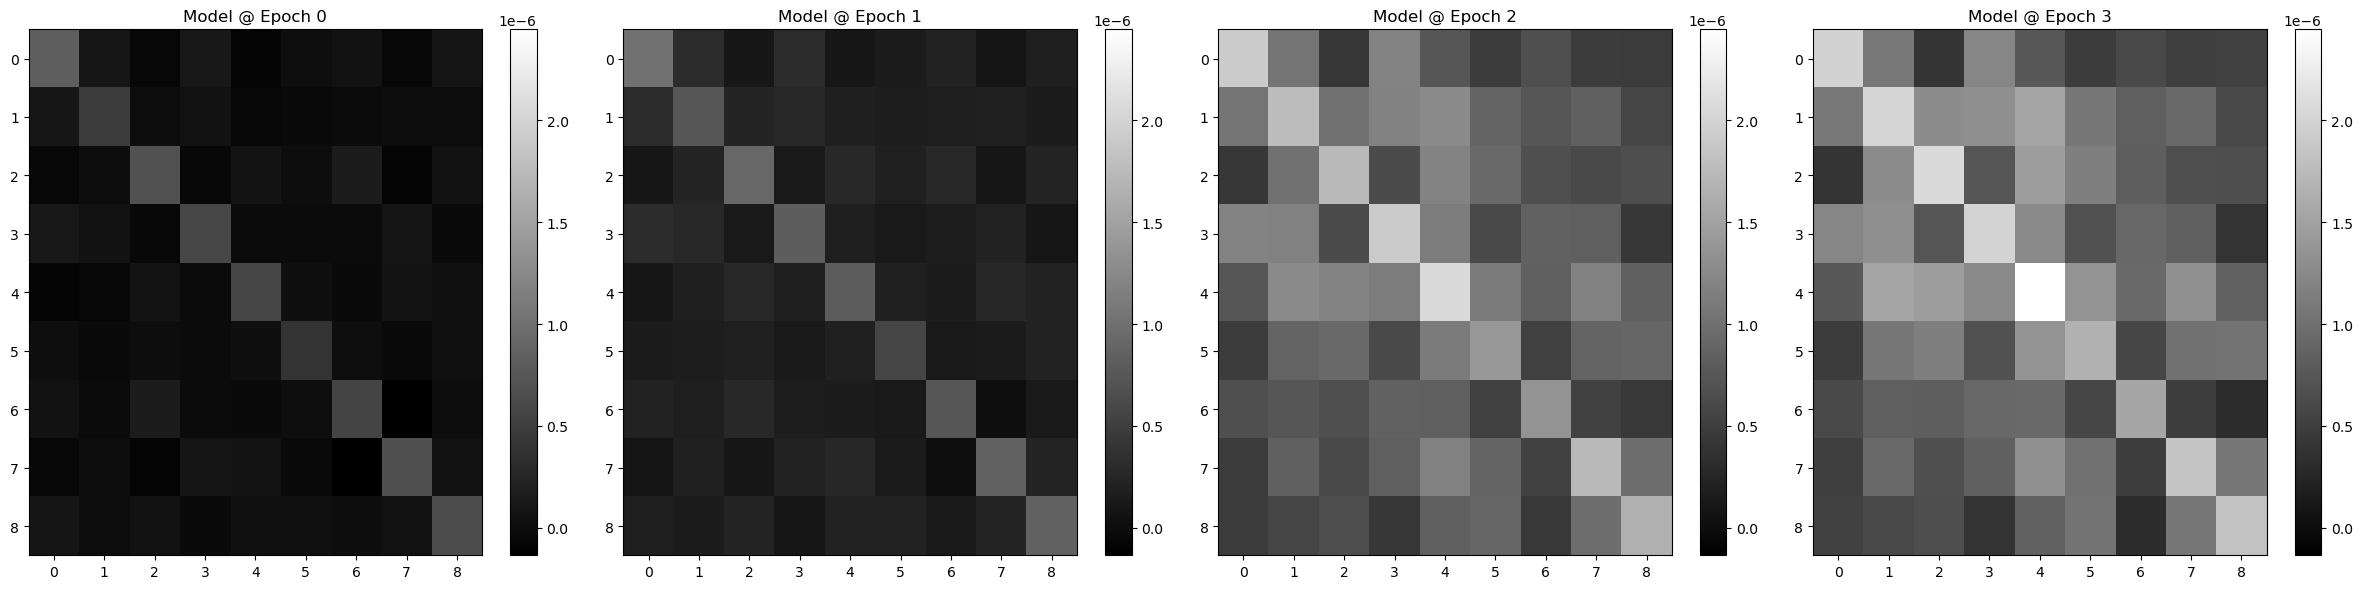

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming weight_0, weight_1, weight_2, and weight_3 are defined somewhere in your code

# Find global min and max values for consistent color scaling
all_weights = [weight_0.T @ weight_0, weight_1.T @ weight_1, weight_2.T @ weight_2, weight_3.T @ weight_3]
vmin = min([np.min(w) for w in all_weights])
vmax = max([np.max(w) for w in all_weights])

fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Create a figure and a 1x4 grid of subplots

# First subplot
im = axes[0].imshow(all_weights[0], cmap='gray', aspect='auto', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axes[0])
axes[0].title.set_text('Model @ Epoch 0')

# Second subplot
im = axes[1].imshow(all_weights[1], cmap='gray', aspect='auto', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axes[1])
axes[1].title.set_text('Model @ Epoch 1')

# Third subplot
im = axes[2].imshow(all_weights[2], cmap='gray', aspect='auto', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axes[2])
axes[2].title.set_text('Model @ Epoch 2')

# Fourth subplot
im = axes[3].imshow(all_weights[3], cmap='gray', aspect='auto', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axes[3])
axes[3].title.set_text('Model @ Epoch 3')

plt.tight_layout()
plt.show()


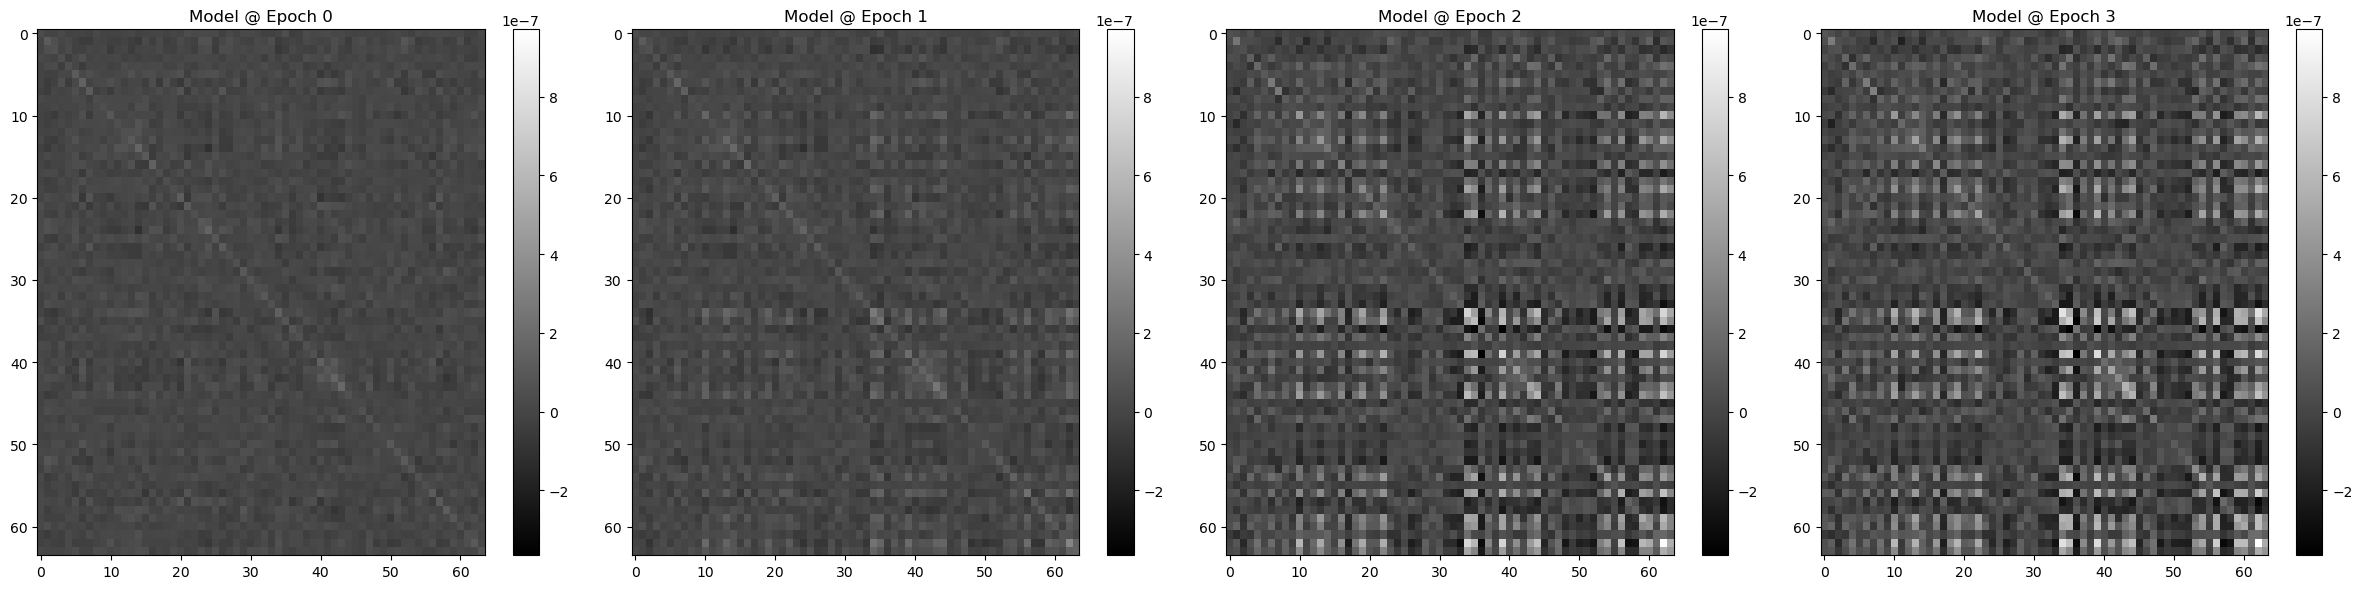

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming weight_0, weight_1, weight_2, and weight_3 are defined somewhere in your code

# Find global min and max values for consistent color scaling
all_weights = [weight_0 @ weight_0.T, weight_1 @ weight_1.T, weight_2 @ weight_2.T, weight_3 @ weight_3.T]
vmin = min([np.min(w) for w in all_weights])
vmax = max([np.max(w) for w in all_weights])

fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Create a figure and a 1x4 grid of subplots

# First subplot
im = axes[0].imshow(all_weights[0], cmap='gray', aspect='auto', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axes[0])
axes[0].title.set_text('Model @ Epoch 0')

# Second subplot
im = axes[1].imshow(all_weights[1], cmap='gray', aspect='auto', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axes[1])
axes[1].title.set_text('Model @ Epoch 1')

# Third subplot
im = axes[2].imshow(all_weights[2], cmap='gray', aspect='auto', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axes[2])
axes[2].title.set_text('Model @ Epoch 2')

# Fourth subplot
im = axes[3].imshow(all_weights[3], cmap='gray', aspect='auto', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=axes[3])
axes[3].title.set_text('Model @ Epoch 3')

plt.tight_layout()
plt.show()
